In [1]:
import numpy as np
import pandas as pd

In [3]:
df_try = pd.read_csv("../data/FIRM-NASA-fire-alert-data/DL_FIRE_J1V-C2_591395/fire_archive_J1V-C2_591395.csv")
df_try

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,16.29705,103.78316,339.22,0.50,0.41,2018-04-01,603,N20,VIIRS,n,2,300.99,4.94,D,0
1,16.21809,103.21005,335.21,0.53,0.42,2018-04-01,603,N20,VIIRS,n,2,302.51,3.10,D,0
2,16.18192,103.56709,333.21,0.51,0.41,2018-04-01,603,N20,VIIRS,n,2,296.31,3.59,D,0
3,15.88159,102.03447,336.77,0.42,0.45,2018-04-01,603,N20,VIIRS,n,2,295.09,3.66,D,0
4,15.88229,102.03834,341.89,0.42,0.45,2018-04-01,603,N20,VIIRS,n,2,295.13,3.66,D,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1007832,14.04759,99.00271,299.40,0.39,0.36,2024-11-30,1853,N20,VIIRS,n,2,288.80,0.25,N,0
1007833,13.52011,100.78498,314.02,0.40,0.37,2024-11-30,1853,N20,VIIRS,n,2,292.78,1.12,N,0
1007834,13.23041,101.16319,301.00,0.41,0.37,2024-11-30,1854,N20,VIIRS,n,2,290.67,0.51,N,0
1007835,12.50110,102.40980,301.61,0.46,0.39,2024-11-30,1854,N20,VIIRS,n,2,290.15,0.49,N,0


In [4]:
#center of Bangkok 13.75633	100.50177
from math import radians, cos, sin, sqrt, atan2

#https://data.opendevelopmentmekong.net/dataset/thailand-provincial-boundaries
#https://www.mapsofworld.com/lat_long/thailand-lat-long.html
#https://data.humdata.org/dataset/cod-ab-tha

c_latitude = 13.75633
c_longitude = 100.50177
radius = 70 #km

In [5]:
#https://undergroundmathematics.org/trigonometry-compound-angles/the-great-circle-distance

def distancesphere(lat1, lon1, lat2, lon2):
    R = 6371.0  # Earth radius in km

    # Convert degrees to radians
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])

    dlat = lat2 - lat1
    dlon = lon2 - lon1

    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c

    return distance

In [6]:
df_try['distance_km'] = df_try.apply(lambda row: distancesphere(c_latitude, c_longitude, row['latitude'], row['longitude']), axis=1)

In [7]:
df_try['distance_km']

0          451.632057
1          399.422940
2          425.617335
3          288.076693
4          288.378435
              ...    
1007832    165.014220
1007833     40.329946
1007834     92.381943
1007835    249.339043
1007836    136.558247
Name: distance_km, Length: 1007837, dtype: float64

In [8]:
within_radius_df = df_try[df_try['distance_km'] <= radius]
print(within_radius_df[['latitude', 'longitude', 'distance_km']])

         latitude  longitude  distance_km
490      14.06136  100.42788    34.842810
564      13.83529  100.23379    30.240999
566      13.87908  100.35175    21.182496
567      13.99993  100.30132    34.668834
573      14.15454  100.24605    52.174039
...           ...        ...          ...
1007486  14.07704  100.64485    38.861398
1007504  14.07771  100.64893    39.106537
1007516  13.70230  100.61863    13.979758
1007517  13.76492  100.90894    43.986114
1007833  13.52011  100.78498    40.329946

[13619 rows x 3 columns]


In [9]:
# within_radius_df.to_csv("inspect.csv")

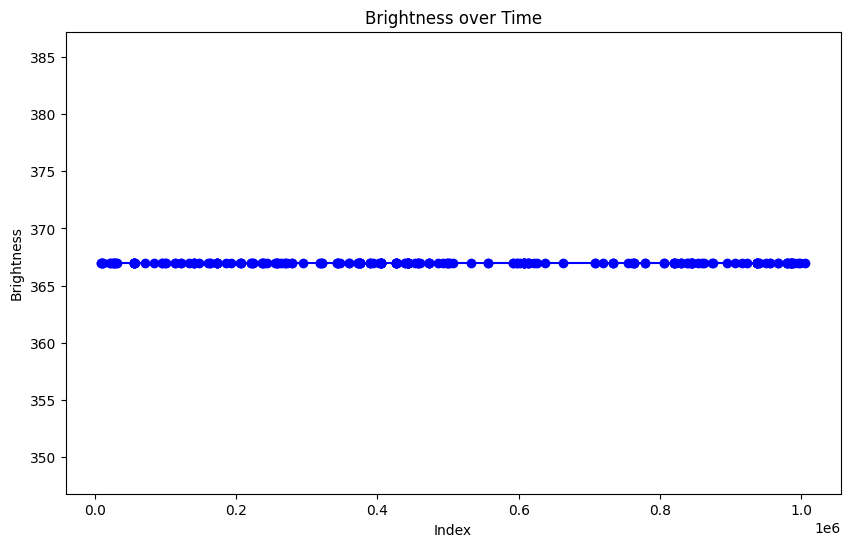

In [11]:
#plot all columns brightness
import matplotlib.pyplot as plt

def plot_brightness(df):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(df.loc[df['confidence'].isin(['h']), 'brightness'], marker='o', linestyle='-', color='b')
    ax.set_title('Brightness over Time')
    ax.set_xlabel('Index')
    ax.set_ylabel('Brightness')
    plt.show()

plot_brightness(within_radius_df)

In [12]:
print(df_try.shape)
print(df_try.loc[df_try['confidence'].isin(['h']), 'brightness'].count())
print(within_radius_df.shape)
print(within_radius_df.loc[within_radius_df['confidence'].isin(['h']), 'brightness'].count())

(1007837, 16)
17177
(13619, 16)
228
